In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [6]:
data = data.drop('Transaction date',axis=1)

In [8]:
data.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [9]:
data.isnull().sum()

House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

<AxesSubplot:>

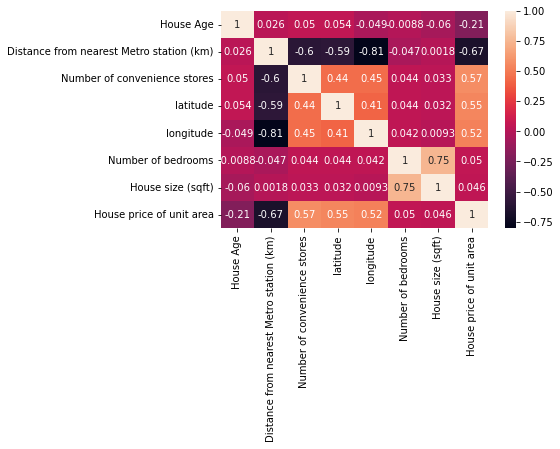

In [12]:
corr = data.corr()
sns.heatmap(corr,annot=True)

In [14]:
Y = data['House price of unit area']
X = data.drop('House price of unit area',axis=1)

In [16]:
Y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: House price of unit area, Length: 414, dtype: float64

## Splitting the data into training data and testing Data

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [21]:
X_train.shape,Y_train.shape

((372, 7), (372,))

## Training The Model

In [22]:
# Here It is the Regression Type Model Hence Regression Model will be Used so we are using here Linear Regression, XGBoost Regression

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [24]:
pred = lr.predict(X_test)

C:\Users\devan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='House price of unit area'>

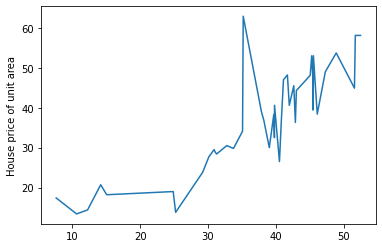

In [25]:
sns.lineplot(pred,Y_test)

C:\Users\devan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='House price of unit area'>

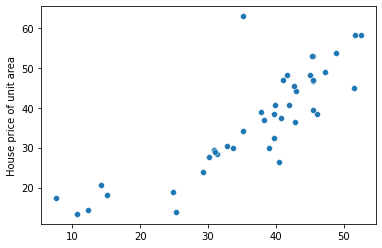

In [26]:
sns.scatterplot(pred,Y_test)

### As we can see that our Model is not that accurate in making the prediction because our predicted value are not very close to the actual values

## Making Prediction Using XGBoost Regression 

In [27]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [28]:
pred = xgb.predict(X_test)

C:\Users\devan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='House price of unit area'>

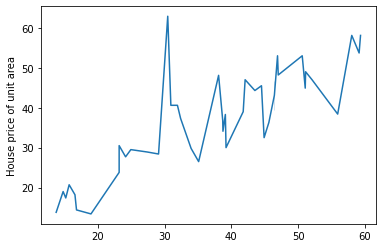

In [29]:
sns.lineplot(pred,Y_test)

## So From XGBR we are getting some how good predictions. The Prediction Can be improved if we do some hyperparameter tuning in the model

In [34]:
# Doing the hyperparameter Tuning using Randomized Search CV

In [38]:
from sklearn.model_selection import RandomizedSearchCV
## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster
    }
rsc = RandomizedSearchCV(estimator=xgb,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [39]:
rsc.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=0, reg_alpha

In [43]:
rsc.best_params_

{'n_estimators': 100,
 'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.05,
 'booster': 'gbtree'}

In [44]:
prediction = rsc.predict(X_test)

C:\Users\devan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='House price of unit area'>

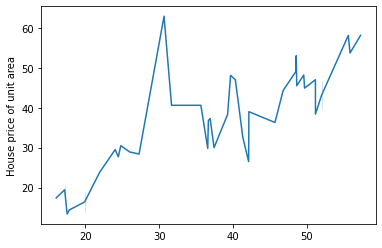

In [45]:
sns.lineplot(prediction,Y_test)

In [46]:
from sklearn.metrics import r2_score
r2_rsc = r2_score(prediction,Y_test)

In [47]:
r2_rsc

0.6355344341462539

In [48]:
r2_xgb = r2_score(pred,Y_test)

In [49]:
r2_xgb

0.6607904191676983

In [178]:
from sklearn.ensemble import RandomForestRegressor
randomfr = RandomForestRegressor()

In [171]:
randomfr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=7, max_features=2)

In [172]:
pred_randomf = randomfr.predict(X_test)

In [173]:
score = r2_score(pred_randomf,Y_test)

In [174]:
score

0.7006824288715277

C:\Users\devan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='House price of unit area'>

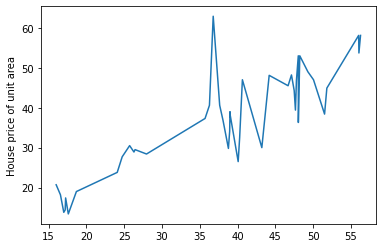

In [175]:
sns.lineplot(pred_randomf,Y_test)

In [179]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3,5,7],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [180]:
random = RandomizedSearchCV(estimator=randomfr,param_distributions=param_grid)

In [181]:
random.fit(X_train,Y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [2, 3, 5, 7],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300, 1000]})

In [182]:
pred_random_f = random.predict(X_test)

C:\Users\devan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='House price of unit area'>

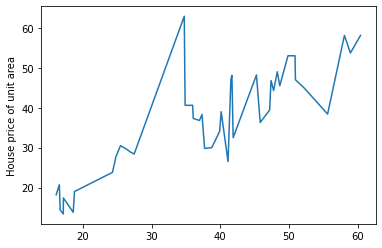

In [184]:
sns.lineplot(pred_random_f,Y_test)

In [185]:
score1 = r2_score(pred_random_f,Y_test)

In [186]:
score1

0.6959545328453489

In [187]:
random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 5,
 'max_depth': 80,
 'bootstrap': True}

# So Using Mutiple Model we have reached to the conclusion that Random Forest Regressor Works well For Now and can be used to make the predictive System

## Making the predictive System

In [195]:
values = [[32.0,84.87882,10,24.98298,121.54024,10,575]]

In [196]:
random.predict(values)

C:\Users\devan\.conda\envs\MachineLearning\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([44.93927758])